In [55]:
import pandas as pd 
import numpy as np 

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

df=pd.read_csv(file_path)

df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [56]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [57]:
df[['Screen_Size_cm']]=np.round(df[['Screen_Size_cm']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [58]:
df.replace('?',np.nan,inplace=True)

In [59]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

   Manufacturer  Category  Screen    GPU     OS  ...  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price
0         False     False   False  False  False  ...          False   False           False      False  False
1         False     False   False  False  False  ...          False   False           False      False  False
2         False     False   False  False  False  ...          False   False           False      False  False
3         False     False   False  False  False  ...          False   False           False      False  False
4         False     False   False  False  False  ...          False   False           False      False  False

[5 rows x 12 columns]
Manufacturer
False    238
Name: Manufacturer, dtype: int64

Category
False    238
Name: Category, dtype: int64

Screen
False    238
Name: Screen, dtype: int64

GPU
False    238
Name: GPU, dtype: int64

OS
False    238
Name: OS, dtype: int64

CPU_core
False    238
Name: CPU_core, dtype: int64

Screen_Size_cm
False   

In [60]:
commom_screen=df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'].replace(np.nan,commom_screen,inplace=True)
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.40,883


In [61]:
avg_weight=df['Weight_kg'].mean(axis=0)
df['Weight_kg'].replace(np.nan,avg_weight,inplace=True)

In [62]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [63]:
df['Screen_Size_cm']=df['Screen_Size_cm']/2.54

df['Weight_kg']=df['Weight_kg']*2.205

df.rename(columns={'Screen_Size_cm':'Screen_Size_inch','Weight_kg':'Weight_pounds'},inplace=True)



In [64]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,2.6,8,256,3.74850,1891
234,Toshiba,3,Full HD,2,1,5,13.299213,2.4,8,256,2.64600,1950
235,Lenovo,4,IPS Panel,2,1,5,12.000000,2.6,8,256,2.99880,2236
236,Lenovo,3,Full HD,3,1,5,15.598425,2.5,6,256,5.29200,883


In [65]:
df['CPU_frequency']=df['CPU_frequency']/df['CPU_frequency'].max()

In [66]:
bins=np.linspace(min(df['Price']),max(df['Price']),4)     #4=عدد الفواصل 

group_names=['low','median','high']

df['price_binned']=pd.cut(df['Price'],bins,labels=group_names,include_lowest=True)
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price_binned
0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,low
1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,low
2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,low
3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low
4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,0.896552,8,256,3.74850,1891,median
234,Toshiba,3,Full HD,2,1,5,13.299213,0.827586,8,256,2.64600,1950,median
235,Lenovo,4,IPS Panel,2,1,5,12.000000,0.896552,8,256,2.99880,2236,median
236,Lenovo,3,Full HD,3,1,5,15.598425,0.862069,6,256,5.29200,883,low


In [67]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price_binned
0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,low
1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,low
2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,low
3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low
4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,0.896552,8,256,3.74850,1891,median
234,Toshiba,3,Full HD,2,1,5,13.299213,0.827586,8,256,2.64600,1950,median
235,Lenovo,4,IPS Panel,2,1,5,12.000000,0.896552,8,256,2.99880,2236,median
236,Lenovo,3,Full HD,3,1,5,15.598425,0.862069,6,256,5.29200,883,low


Text(0.5, 1.0, 'price bins')

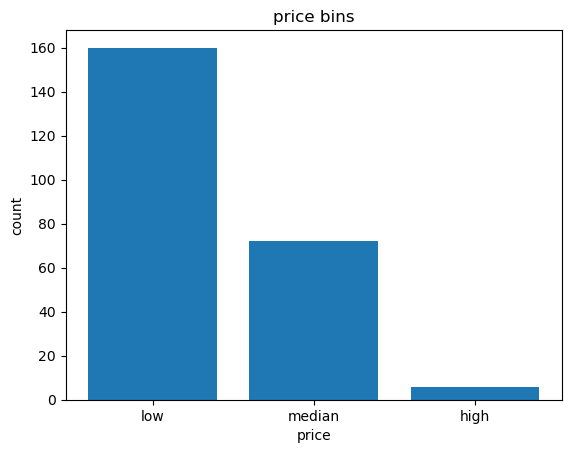

In [68]:
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.bar(group_names,df['price_binned'].value_counts())

plt.pyplot.xlabel('price')
plt.pyplot.ylabel('count')
plt.pyplot.title('price bins')

In [69]:
dummy_var=pd.get_dummies(df['Screen'])
dummy_var

dummy_var.rename(columns={'Full HD':'Screen-Full-HD','IPS Panel':'Screen-IPS-Panel'},inplace=True)
dummy_var

,Screen-Full-HD,Screen-IPS-Panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [70]:
df=pd.concat([df,dummy_var],axis=1)
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price_binned,Screen-Full-HD,Screen-IPS-Panel
0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,low,0,1
1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,low,1,0
2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,low,1,0
3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low,0,1
4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,0.896552,8,256,3.74850,1891,median,0,1
234,Toshiba,3,Full HD,2,1,5,13.299213,0.827586,8,256,2.64600,1950,median,1,0
235,Lenovo,4,IPS Panel,2,1,5,12.000000,0.896552,8,256,2.99880,2236,median,0,1
236,Lenovo,3,Full HD,3,1,5,15.598425,0.862069,6,256,5.29200,883,low,1,0


In [71]:
df.drop('Screen',axis=1,inplace=True)

In [72]:
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price_binned,Screen-Full-HD,Screen-IPS-Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,low,0,1
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,low,1,0
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,low,1,0
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,low,0,1
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.000000,0.896552,8,256,3.74850,1891,median,0,1
234,Toshiba,3,2,1,5,13.299213,0.827586,8,256,2.64600,1950,median,1,0
235,Lenovo,4,2,1,5,12.000000,0.896552,8,256,2.99880,2236,median,0,1
236,Lenovo,3,3,1,5,15.598425,0.862069,6,256,5.29200,883,low,1,0


In [73]:
df.to_csv('laptop_clean.csv')